# Восьмая лабораторная работа
Андрей Алексеевич, группа 20201

In [2]:
import thinkdsp as td
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Задание 1.
Изучить преобразование Фурье гауссовой кривой.

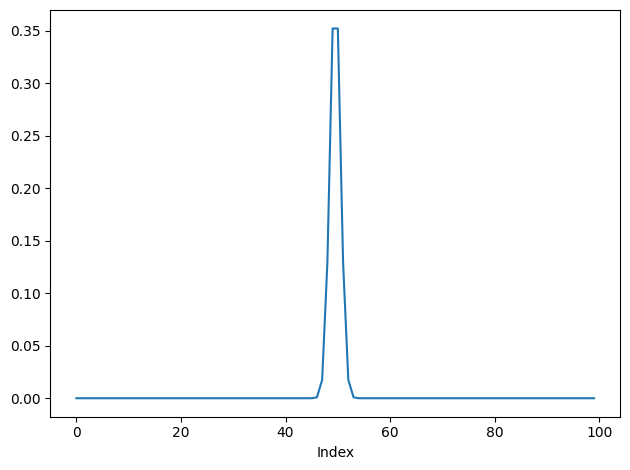

In [25]:
gaussian = scipy.signal.windows.gaussian(M=100, std=1)
gaussian /= sum(gaussian)
plt.plot(gaussian)
td.decorate(xlabel='Index')

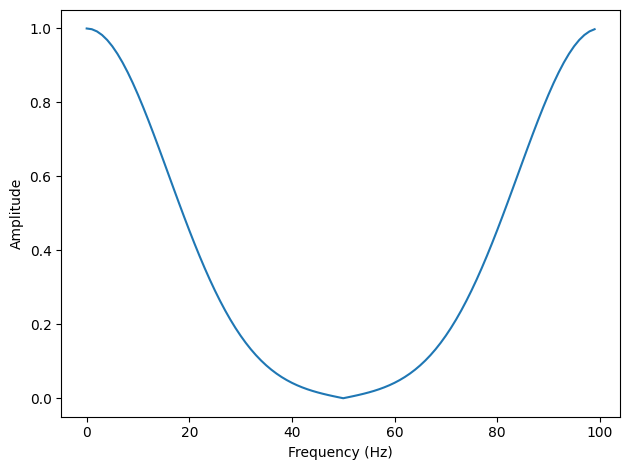

In [26]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
td.decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

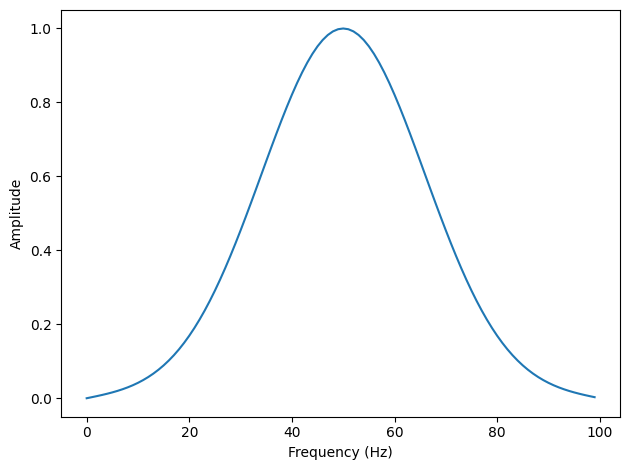

In [27]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
td.decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

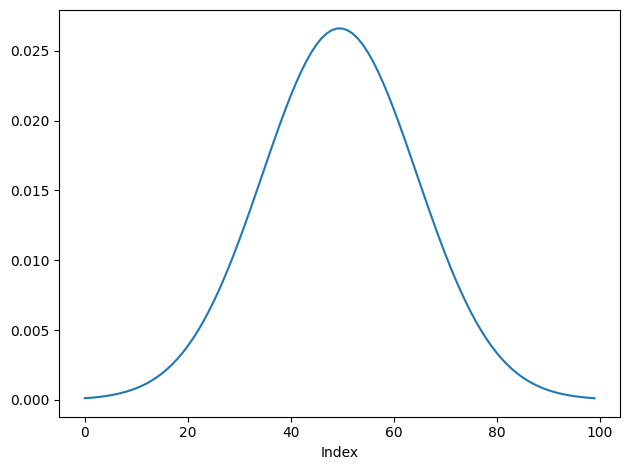

In [30]:
gaussian2 = scipy.signal.windows.gaussian(M=100, std=15)
gaussian2 /= sum(gaussian2)
plt.plot(gaussian2)
td.decorate(xlabel='Index')

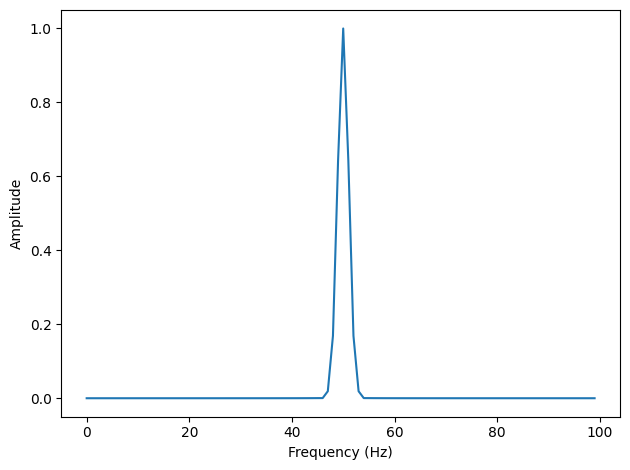

In [31]:
fft_gaussian2 = np.fft.fft(gaussian2)
N = len(gaussian2)
fft_rolled2 = np.roll(fft_gaussian2, N//2)
plt.plot(abs(fft_rolled2))
td.decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

БПФ Гауссовой кривой действительно также имеет форму Гауссовой кривой.
С увеличением STD Гауссовая кривая становится шире, а её БПФ становится уже, и наоборот.

## Задание 2.
Создать окно Хэмминга на подобии Гауссова окна, тех же размеров. Изучить эффективность окон для фильтрации НЧ. Поэкспериментировать с разными окнами и их размерами.

In [46]:
signal = td.SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

In [84]:
M = 15
std = 5

gaussian = scipy.signal.windows.gaussian(M=M, std=std)   
hamming = np.hamming(M)
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hanning = np.hanning(M)

windows = [gaussian, hamming, bartlett, blackman, hanning]
names = ['gaussian', 'hamming', 'bartlett', 'blackman', 'hanning']

for window in windows:
    window /= sum(window)

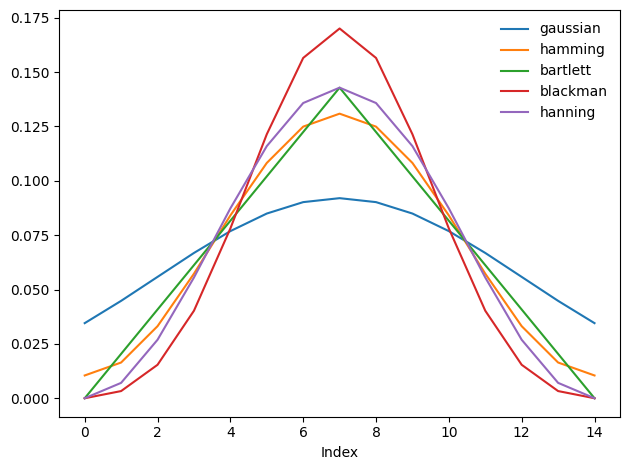

In [85]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

td.decorate(xlabel='Index')

In [86]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

In [87]:
def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded = zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

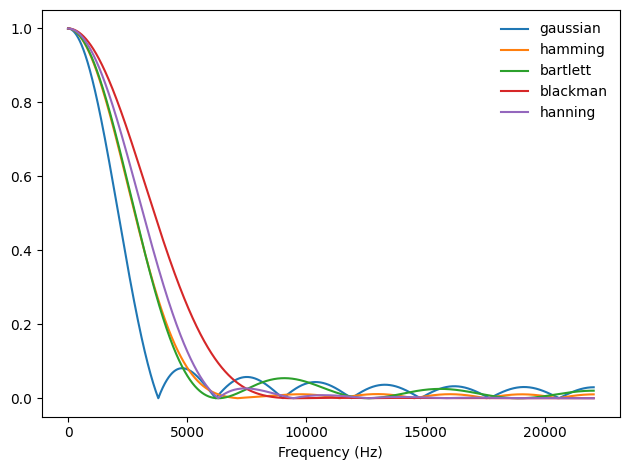

In [88]:
plot_window_dfts(windows, names)
td.decorate(xlabel='Frequency (Hz)')

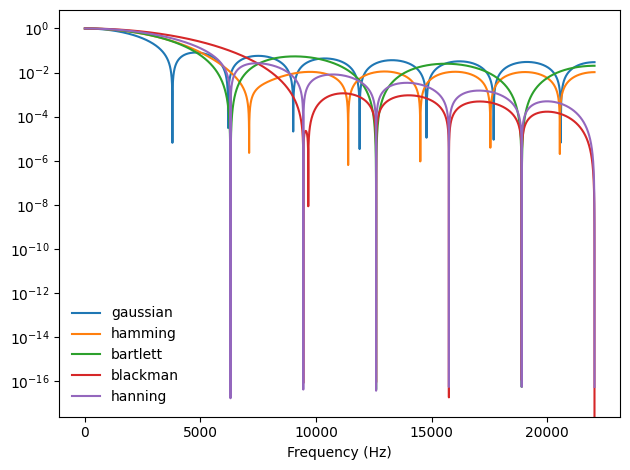

In [89]:
plot_window_dfts(windows, names)
td.decorate(xlabel='Frequency (Hz)', yscale='log')

Окна Гаусса и Барлетта имеют более выраженные боковые лепестки, чем остальные. Гауссово окно спадает быстрее всех остальных. Для фильтра НЧ может хорошо подойти окно Гаусса или окно Ханнинга.